# ANOVA- Analysis Of Variance


* A test for similarity of means of the gaussian distributions for more than 2 distributions.
* We can test for k random variables where k > 2, and let we have m samples for each random variables , then n=m*k

Lets understand annova with an example

let a hospital is conducting experiments with k drugs on m patients each. and out task is to find whether the mean recovery times of the patients for each drug is same or not

TASK:

* Checking whether average recovery times of the n patients for k drugs is same or not 

Assumptions:
1.     Each group recovery times population are gaussian
2.     Each groups variance is same or similar
3.     All observations are independent of each other.

Null and alternative hypothesis:
* H0 – no difference in recovery times in k groups
* Ha – where is difference in the recovery times for k groups may be all are different or some are different.

Test Statistic:

$F = MSB/MSW $

MSB =  mean of sum of squares means between groups 
MSW = mean of sum of squares of means with in the groups.

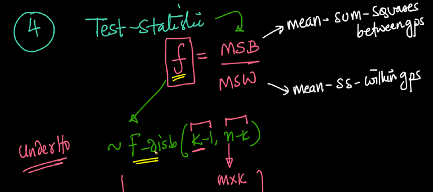

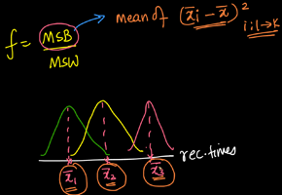

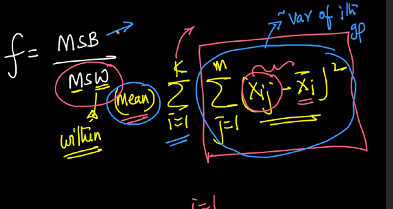

* Test statistic f follows the f-distribution 

reference: https://en.wikipedia.org/wiki/F-distribution

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/F-distribution_pdf.svg/1280px-F-distribution_pdf.svg.png)

### Type of test :

* right sided test.

### P-Value:

* Area under the f- distribution curve on right sides of the Tobs as it is right sided test.

Note: ANNOVA is the simplest form of linear regression.






In [3]:
# Importing library
from scipy.stats import f_oneway
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

# random integer generation from the gaussian distribution
x = np.arange(1, 100)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1

# drug_recovery time in days for m patients for k drugs let m = 100 , k = 4
drug_recovery1 = np.random.choice(x, size = 100, p = prob)
drug_recovery2 = np.random.choice(x, size = 100, p = prob)
drug_recovery3 = np.random.choice(x, size = 100, p = prob)
drug_recovery4 = np.random.choice(x, size = 100, p = prob)
 
# Conduct the one-way ANOVA
f_oneway(drug_recovery1, drug_recovery2, drug_recovery3, drug_recovery4)

F_onewayResult(statistic=2.2246053347849752, pvalue=0.08480350882889692)

As p_value is > 0.05% we fail to reject null hypothesis.

# Two Way ANNOVA

* Two-Way ANOVA in statistics stands for Analysis of Variance and it is used to check whether there is a statistically significant difference between the mean value of three or more that has been divided into two factors. 

* In simple words, ANOVA is a test conducted in statistics and it is used to interpret the difference between the mean value of at least three groups. 

* The main objective of a two-way ANOVA is to find out how two factors affect a response variable and to find out whether there is a relation between the two factors on the response variable.

## two way annova with example

Let us consider an example in which scientists need to know whether plant growth is affected by fertilizers and watering frequency. They planted exactly 30 plants and allowed them to grow for six months under different conditions for fertilizers and watering frequency. After exactly six months, they recorded the heights of each plant centimeters.

* fertilizers: how frequently each plant was fertilized that is daily or weekly.
* watering: how frequently each plant was watered that is daily or weekly.
* height: the height of each plant (in inches) after six months.

In [10]:

# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
  
# Create a dataframe
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15),
                          'Watering': np.repeat(['daily', 'weekly'], 15),
                          'height': [14, 16, 15, 15, 16, 13, 12, 11,
                                     14, 15, 16, 16, 17, 18, 14, 13, 
                                     14, 14, 14, 15, 16, 16, 17, 18,
                                     14, 13, 14, 14, 14, 15]})
  
  
# Performing two-way ANOVA
model = ols('height ~ C(Fertilizer) + C(Watering) +\
C(Fertilizer):C(Watering)',
            data=dataframe).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   0.033333  0.033333  0.012069  0.913305
C(Watering)                 1.0   0.000369  0.000369  0.000133  0.990865
C(Fertilizer):C(Watering)   1.0   0.040866  0.040866  0.014796  0.904053
Residual                   28.0  77.333333  2.761905       NaN       NaN


NOTE: we have MANOVA which is nothing but multi variate Analysis of varience
one way ANOVA, two way anova , multivariate anova all are used to check whether how multiple variables are effecting the dependent variables , but linear regression does the same, hence ANOVA , MANOVA are the simple implementations of linear regression.

